# Is the Super Bowl a Cereal Eating Contest?
![](https://i.kym-cdn.com/entries/icons/original/000/028/596/dsmGaKWMeHXe9QuJtq_ys30PNfTGnMsRuHuo_MUzGCg.jpg)
## For everyone around the world (Except the USA)
> The Super Bowl is an annual American football game that determines the champion of the National Football League (NFL). The game culminates a season that begins in the previous calendar year, and is the conclusion of the NFL playoffs. The contest is held in an American city, chosen three to four years beforehand, usually at warm-weather sites or domed stadiums. Since January 1971, the winner of the American Football Conference (AFC) Championship Game has faced the winner of the National Football Conference (NFC) Championship Game in the culmination of the NFL playoffs.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superbowl-history-1967-2020/superbowl.csv


**This dataset contains data about the Superbowl finals from 1967 to 2020. It's pretty simple and straightforward, one row per superbowl. **
Data from https://www.pro-football-reference.com/super-bowl

In [2]:
df = pd.read_csv('../input/superbowl-history-1967-2020/superbowl.csv')

In [3]:
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(str(x), '%b %d %Y').strftime('%d/%m/%Y'))
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Win Margin'] = df['Winner Pts'] - df['Loser Pts']
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Win Margin
0,2020-02-02,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,11
1,2019-03-02,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,10
2,2018-04-02,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,8
3,2017-05-02,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,6
4,2016-07-02,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,14


In [4]:
print("Total Number of Seasons The Super Bowl Has been held for", len(df))
print("Unique Dates", len(df['Date'].unique()))

Total Number of Seasons The Super Bowl Has been held for 54
Unique Dates 54


## Fact - Every Super Bowl has been held on a unique date by far.

In [5]:
state = df.groupby('State').count()
state.sort_values(by = 'Date', ascending = False, inplace = True)

city = df.groupby('City').count()
city.sort_values(by = 'Date', ascending = False, inplace = True)

In [6]:
city = go.Pie(labels=city.index,values=city['Date'],name="City",hole=0.4,domain={'x': [0,0.46]})
state = go.Pie(labels=state.index,values=state['Date'],name="State",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Matches Count by Cities And State', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='City', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='State', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[city, state], layout=layout)
py.iplot(fig)

> Most matches held in the states of
> * Florida
> * California
> * Louisiana
> 
> Most seasons held in the city of
> * New Orleans
> * Miami Gardens
> * Pasadena

In [7]:
mvp = df.groupby('MVP').count().sort_values(by = 'Date', ascending = False)

fig = go.Figure(data=[go.Bar(
            x = mvp.index[:5],
            y = mvp['Date'],
            #text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='dodgerblue')
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Player Names'),width=700,height=500,
                  title= 'Most MVPs',
                  xaxis=dict(title='Names'))
fig.show()

#### Tom Brady the MVP

In [8]:
winner = df.groupby('Winner').count()
winner.sort_values(by = 'Date', ascending = False, inplace = True)

loser = df.groupby('Loser').count()
loser.sort_values(by = 'Date', ascending = False, inplace = True)

In [9]:
win = go.Pie(labels=winner.index,values=winner['Date'],name="Winner",hole=0.5,domain={'x': [0,0.46]})
los = go.Pie(labels=loser.index,values=loser['Date'],name="Loase",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Teams with Most Wins and Loses', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='W', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='L', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[win, los], layout=layout)
py.iplot(fig)

![](https://cdn.bleacherreport.net/images/team_logos/328x328/pittsburgh_steelers.png)

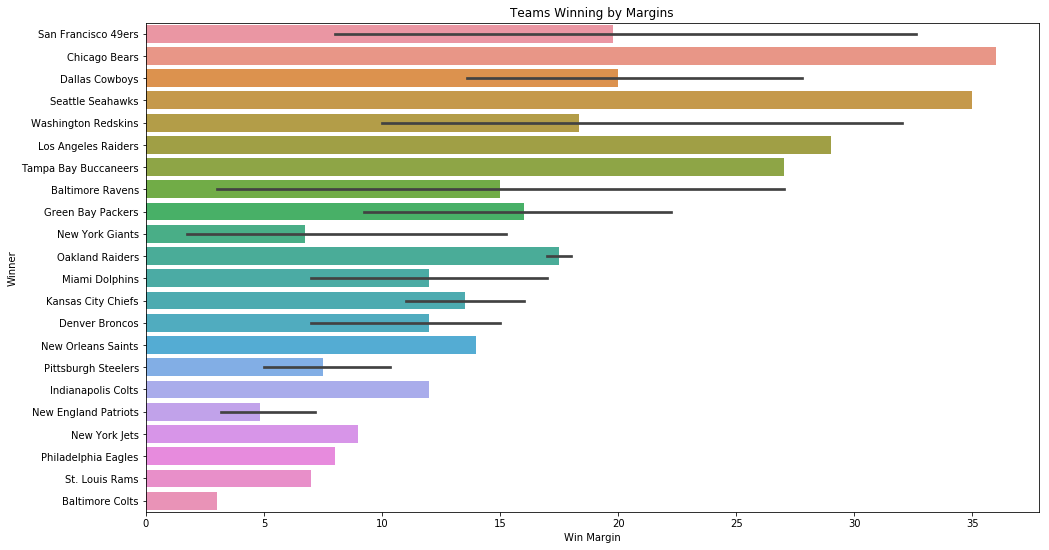

In [10]:
margin = df.sort_values(by = 'Win Margin', ascending = False)
plt.figure(figsize = (16, 9))
plt.title("Teams Winning by Margins")
sns.barplot(x = 'Win Margin', y = 'Winner', data = margin)

In [11]:
stadium = df.groupby(['Stadium']).count().sort_values(by = 'Date', ascending = False)

## Stadiums that have hosted the most number of Matches

In [12]:
fig = go.Figure(data=[go.Bar(
            x = stadium.index[:10],
            y = stadium['Date'],
            #text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color=["steelblue","dodgerblue","lightskyblue","powderblue","cyan","deepskyblue","cyan","darkturquoise","paleturquoise","turquoise"])
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Stadium Name'),width=700,height=500,
                  title= 'Most Matches',
                  xaxis=dict(title='Names'))
fig.show()

In [13]:
highest = df.sort_values(by = 'Winner Pts', ascending = False)
lowest = df.sort_values(by = "Loser Pts")

In [14]:
def plot_graph(data,x,y,title,x_axis_title):
    df = data
    trace1 = go.Bar(
                    y = df[y],
                    x = df[x][0:20],
                    orientation='h',
                    marker = dict(color='skyblue',
                                 line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(title=title,width=800, height=500, 
                       xaxis= dict(title=x_axis_title),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## Most and Least points scored by a team in a Single Game

In [15]:
plot_graph(highest,'Winner Pts', 'Winner', 'Most Points In a Single Game', 'Points')

In [16]:
plot_graph(lowest,'Loser Pts', 'Loser', 'Least Points In a Single Game', 'Points')

## If you found this notebook useful do upvote !!

![](https://www.tasteofhome.com/wp-content/uploads/2018/03/shutterstock_578723482.jpg)